In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from functools import partial

from cea import cea_gen
from operators import mutate_swap
from operators import nhood_linear
from operators import recomb_ordered
from operators import sample_intperm
from operators import select_linear

def evaluate_path(path, graph):
    n = path.shape[0]
    sum = 0.0
    for i, p in enumerate(path[:-1]):
        pnext = path[i + 1]
        sum  += G[p][pnext]["weight"]
    sum += G[path[0]][path[-1]]["weight"]
    return -sum

def evaluate(population, graph):
    eval_p = partial(evaluate_path, graph=graph)
    return np.apply_along_axis(eval_p, 2, population)

In [2]:
DIMS  = (32, 32)
NODES = 25

np.random.seed(0)
G = nx.complete_graph(NODES)
G_pos = nx.spring_layout(G, seed=0)
for _, _, w in G.edges(data=True):
    w["weight"] = np.random.randint(1, 100)

EVAL   = partial(evaluate, graph=G)
NHOOD  = partial(nhood_linear, n=9)
SELECT = select_linear
RECOMB = recomb_ordered
MUTATE = mutate_swap

pop = sample_intperm(NODES, DIMS + (NODES,))
fit = EVAL(pop)
print(np.min(-fit), np.max(-fit))

777.0 1566.0


In [3]:
# fig, axes = plt.subplots(6, 6, figsize=(16, 16), subplot_kw={"xticks": (), "yticks": ()})

# for step, ax in zip(range(6 * 6), axes.ravel()):
for step in range(100):
    pop, fit = cea_gen(pop, fit, DIMS, 
        f_evaluate=EVAL,
        f_nhood   =NHOOD,
        f_select  =SELECT,
        f_recomb  =RECOMB,
        f_mutate  =MUTATE)
    # ax.imshow(-fit)
    if (step + 1) % 10 == 0: print("step ({:3})".format(step + 1))

step ( 10)
step ( 20)
step ( 30)
step ( 40)
step ( 50)
step ( 60)
step ( 70)
step ( 80)
step ( 90)
step (100)


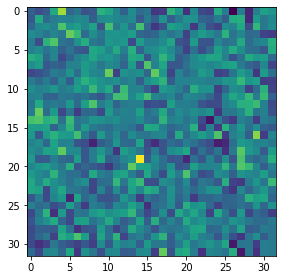

In [4]:
plt.imshow(-fit)
plt.tight_layout()

In [5]:
print(np.min(-fit), np.max(-fit))

547.0 1518.0
